<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Download models and install dependencies

In [1]:
! git clone https://github.com/kuprel/min-dalle
! mkdir -p /content/min-dalle/pretrained/vqgan/
! curl https://huggingface.co/dalle-mini/vqgan_imagenet_f16_16384/resolve/main/flax_model.msgpack -L --output /content/min-dalle/pretrained/vqgan/flax_model.msgpack
! pip install torch flax==0.4.2 wandb
! wandb login --anonymously
! wandb artifact get --root=/content/min-dalle/pretrained/dalle_bart_mini dalle-mini/dalle-mini/mini-1:v0
! wandb artifact get --root=/content/min-dalle/pretrained/dalle_bart_mega dalle-mini/dalle-mini/mega-1-fp16:v14


Cloning into 'min-dalle'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 237 (delta 68), reused 79 (delta 53), pack-reused 128
Receiving objects: 100% (237/237), 679.18 KiB | 5.57 MiB/s, done.
Resolving deltas: 100% (128/128), done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   234  100   234    0     0    832      0 --:--:-- --:--:-- --:--:--   832
100  290M  100  290M    0     0   162M      0  0:00:01  0:00:01 --:--:--  253M
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 186 kB 7.6 MB/s 
     |████████████████████████████████| 1.8 MB 40.0 MB/s 
     |████████████████████████████████| 140 kB 44.2 MB/s 
     |████████████████████████████████| 181 kB 62.2 MB/s 
     |█████████

### Load Model
Note: mega requires the high-RAM runtime type, uncheck it if you're using standard

In [2]:
import os
os.chdir('/content/min-dalle')
from min_dalle.min_dalle_torch import MinDalleTorch
from min_dalle.min_dalle_flax import MinDalleFlax

mega = True #@param {type:"boolean"}
torch = True #@param {type:"boolean"}

model = MinDalleTorch(mega) if torch else MinDalleFlax(mega)


reading files from pretrained/dalle_bart_mega
initializing MinDalleTorch
loading encoder
loading decoder


### Generate an Image

tokenizing text
['Ġa']
['Ġcomfy']
['Ġchair']
['Ġthat']
['Ġlooks']
['Ġlike']
['Ġan']
['Ġavocado']
text tokens [0, 58, 29872, 2408, 766, 4126, 1572, 101, 16632, 2]
encoding text tokens
sampling image tokens
detokenizing image


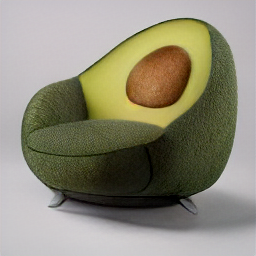

In [21]:
text = "a comfy chair that looks like an avocado" #@param {type:"string"}
seed = 10 #@param {type:"integer"}

image = model.generate_image(text, seed)
display(image)